---
<h1> Automatic face detection in images/video streams </h1>

---

<p align='justify'>

This project is focused on the issue of face detection in images/video streams using two computer vision methods: (1). **Viola-Jones algorithm** (i.e., feature-based technique that adopts a cascade classifier) and (2).  **Multi-task Cascade Convolutional Neural Network algorithm (MTCNN)** (i.e., a deep learning CNN method).

we will perform face detection by applying classical and deep learning models. we will implement a face detection framework and will perform the system evaluation with respect to an objective evaluation metric: **intersection over union (IoU)**.
</p>



The three models are not connected directly. The outputs of the previous stage are fed as input to the next stage. This allows additional processing to be performed between stages; for example, **non-maximum suppression (NMS)** is used to filter the candidate bounding boxes proposed by the first-stage (P-Net) prior to providing them to the second stage (R-Net) model.

# Practical implementation

The following example aims to evaluate the performances of two popular face detection methods by comparing the results against a ground truth that contains the faces' bounding boxes manually annotated by human observers. The ground truth is stored within a textual document that contains, for each image in the testing dataset, the faces bounding boxes.





In [ ]:
!gdown --id 1uhud_#*****************

/usr/local/lib/python3.11/dist-packages/gdown/__main__.py:140: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From: https://drive.google.com/uc?id=1uhud_b2GhmznmCyfqH3YjCk8giQUEqSY
To: /content/TP4_FaceDetection.zip
100% 1.27M/1.27M [00:00<00:00, 132MB/s]


In [ ]:
!unzip  /content/TP4_FaceDetection.zip -d /content/

Archive:  /content/TP4_FaceDetection.zip
   creating: /content/TP4_FaceDetection/
   creating: /content/TP4_FaceDetection/FaceReID/
  inflating: /content/TP4_FaceDetection/FaceReID/1.jpg  
  inflating: /content/TP4_FaceDetection/FaceReID/2.jpg  
  inflating: /content/TP4_FaceDetection/FaceReID/3.jpg  
  inflating: /content/TP4_FaceDetection/FaceReID/4.jpg  
  inflating: /content/TP4_FaceDetection/FaceReID/5.jpg  
  inflating: /content/TP4_FaceDetection/FaceReID/6.jpg  
   creating: /content/TP4_FaceDetection/GT_FaceImages/
  inflating: /content/TP4_FaceDetection/GT_FaceImages/1.jpg  
 extracting: /content/TP4_FaceDetection/GT_FaceImages/1_GT.txt  
  inflating: /content/TP4_FaceDetection/GT_FaceImages/2.jpg  
  inflating: /content/TP4_FaceDetection/GT_FaceImages/2_GT.txt  
  inflating: /content/TP4_FaceDetection/GT_FaceImages/3.jpg  
  inflating: /content/TP4_FaceDetection/GT_FaceImages/3_GT.txt  


In [ ]:
!pip install mtcnn

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 37.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 62.6 MB/s eta 0:00:00


In [ ]:
!pip install opencv-python


In [ ]:
!pip install tensorflow


In [ ]:
import cv2
import glob
import os
from mtcnn.mtcnn import MTCNN
import numpy as np
from scipy.optimize import linear_sum_assignment
from matplotlib import pyplot as plt

In [ ]:
def faceDetectionViolaJones(img):
  #The faceDetectionViolaJones method receives as input an image and returns the bounding boxes
  #of all the detected faces

  bboxes = []

  #Convert the image to a grayscale image
  gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

  #Load the pre-trained cascade classifier model called haarcascade_frontalface_default.xml
  classifier = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')

  #Perform face detection using the default parameters (scaleFactor = 1.1, minNeighbors = 3)
  detected = classifier.detectMultiScale(gray, scaleFactor=1.1, minNeighbors=3)


  #ViolaJones detector returns bounding boxes as [x1, y1, w, h].
  # Convert them to a format [x1, y1, x2, y2]
  for (x, y, w, h) in detected:
        x1 = x
        y1 = y
        x2 = x + w
        y2 = y + h
        bboxes.append([x1, y1, x2, y2])


  return bboxes

In [ ]:
imgfiles = glob.glob("/content/TP4_FaceDetection/GT_FaceImages/*.jpg")

In [ ]:
imgfiles

['/content/TP4_FaceDetection/GT_FaceImages/1.jpg',
 '/content/TP4_FaceDetection/GT_FaceImages/2.jpg',
 '/content/TP4_FaceDetection/GT_FaceImages/3.jpg']

In [ ]:
for imgf in imgfiles:
  img = cv2.imread(imgf)
  #TODO - Exercise 1 - Call the faceDetectionViolaJones method
  bboxes = faceDetectionViolaJones(img)
  print(f"{imgf}: {bboxes}")

/content/TP4_FaceDetection/GT_FaceImages/1.jpg: [[np.int32(537), np.int32(40), np.int32(630), np.int32(133)], [np.int32(322), np.int32(47), np.int32(416), np.int32(141)]]
/content/TP4_FaceDetection/GT_FaceImages/2.jpg: [[np.int32(264), np.int32(76), np.int32(390), np.int32(202)], [np.int32(37), np.int32(83), np.int32(167), np.int32(213)], [np.int32(479), np.int32(68), np.int32(617), np.int32(206)], [np.int32(513), np.int32(192), np.int32(586), np.int32(265)], [np.int32(304), np.int32(220), np.int32(420), np.int32(336)]]
/content/TP4_FaceDetection/GT_FaceImages/3.jpg: [[np.int32(335), np.int32(29), np.int32(369), np.int32(63)], [np.int32(427), np.int32(48), np.int32(465), np.int32(86)], [np.int32(127), np.int32(31), np.int32(167), np.int32(71)], [np.int32(218), np.int32(39), np.int32(261), np.int32(82)], [np.int32(257), np.int32(17), np.int32(323), np.int32(83)], [np.int32(366), np.int32(156), np.int32(408), np.int32(198)], [np.int32(255), np.int32(147), np.int32(297), np.int32(189)], [

In [ ]:
def drawDetectedFaces(img, bboxes):
  img_copy = img.copy()  # Avoid modifying the original image
  for box in bboxes:
    # Draw the reactangles
    x1, y1, x2, y2 = box
    cv2.rectangle(img_copy, (x1, y1), (x2, y2), (0, 255, 0), 2)

  # Convert BGR to RGB (OpenCV loads images in BGR format)
  img_rgb = cv2.cvtColor(img_copy, cv2.COLOR_BGR2RGB)

  # Display the image using matplotlib
  plt.figure(figsize=(8, 6))
  plt.imshow(img_rgb)
  plt.axis('off')
  plt.title("Detected Faces")
  plt.show()


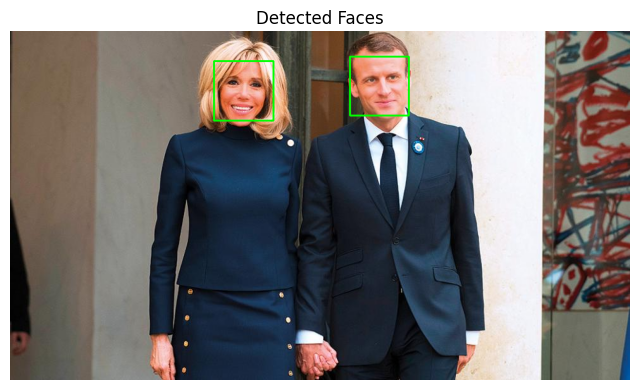

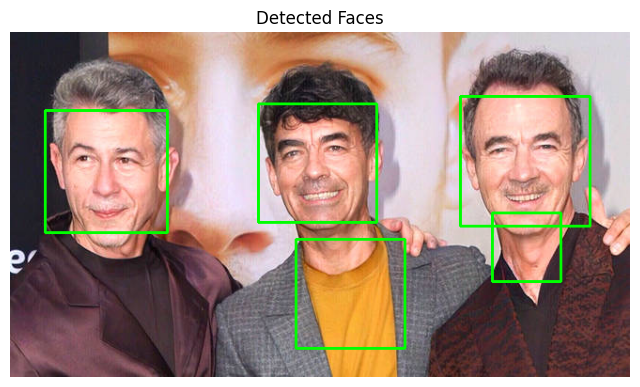

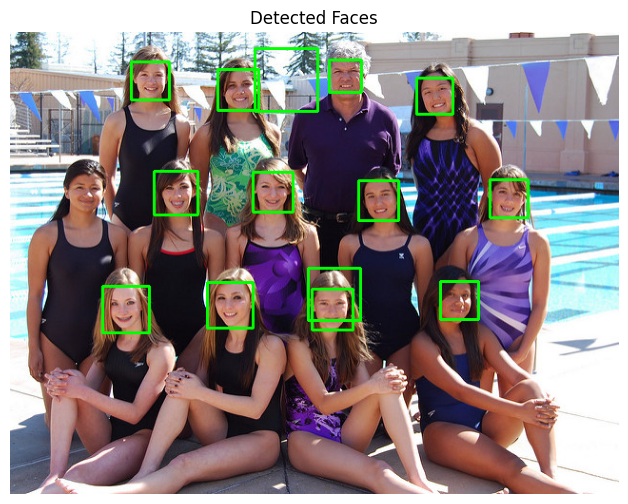

In [ ]:
for imgf in imgfiles:
  img = cv2.imread(imgf)
  bboxes = faceDetectionViolaJones(img)
  drawDetectedFaces(img, bboxes)

In [ ]:
def computeIntersectionOverUnion(box, box_GT):

  #This function computes the intersection over union score (iou)
  iou = 0

  #Compute the rectangle resulted by the intersection of the two bounding boxes
  # This should be specified in the following format [x1, y1, x2, y2]
  x1 = max(box[0], box_GT[0])
  y1 = max(box[1], box_GT[1])
  x2 = min(box[2], box_GT[2])
  y2 = min(box[3], box_GT[3])
  rectInters = [x1, y1, x2, y2]

  #Compute the area of rectInters (rectIntersArea)
  if x2 > x1 and y2 > y1:
      rectIntersArea = (x2 - x1) * (y2 - y1)
  else:
      rectIntersArea = 0

  #Compute the area of the box (boxArea)
  boxArea = (box[2] - box[0]) * (box[3] - box[1])


  #Compute the area of the box_GT (boxGTArea)
  boxGTArea = (box_GT[2] - box_GT[0]) * (box_GT[3] - box_GT[1])


  #Compute the union area (unionArea) of the two boxes
  unionArea = boxArea + boxGTArea - rectIntersArea


  #Compute the intersection over union score (iou)
  if unionArea > 0:
      iou = rectIntersArea / unionArea

  return iou

In [ ]:
def compareAgainstGT(imgf, bboxes):

    #This function compare the list of detected faces against the ground truth

    d_faces = 0         #the number of correctly detected faces
    md_faces = 0        #the number of missed detected faces
    fa = 0              #the number of false alarms

    bboxes_GT = []

    #Open the file with the ground truth for the associated image (imgf)
    # and read its content
    gt_file = imgf.replace('.jpg', '_GT.txt')
    with open(gt_file, 'r') as f:
        lines = f.readlines()

    #Save the bounding boxes parsed from the GT file into the bboxes_GT list
    for line in lines:
        line = line.strip()
        coords = list(map(int, line.split()))
        # convert [x, y, w, h] to [x1, y1, x2, y2]
        x1, y1, w, h = coords
        x2 = x1 + w
        y2 = y1 + h
        bboxes_GT.append([x1, y1, x2, y2])

    #Perform the validation of the bboxes (detected automatically)
    # against the bboxes_GT (annotated manually). In order to verify if two bounding boxes overlap it is necessary
    # to define another function denoted "computeIntersectionOverUnion(box, box_GT)"
    matched_GT = set()
    Th_1 = 0.2

    for box in bboxes:
        found_match = False
        for i, box_GT in enumerate(bboxes_GT):
            iou = computeIntersectionOverUnion(box, box_GT)
            if iou >= Th_1 and i not in matched_GT:
                d_faces += 1
                matched_GT.add(i)
                found_match = True
                break
        if not found_match:
            fa += 1  # false alarm: no matching GT box


    #Display the scores
    print("The scores for image {} are:".format(imgf))
    print("   - The number of correctly detected faces: {}".format(d_faces))
    print("   - The number of missed detected faces: {}".format(md_faces))
    print("   - The number of false alarms: {}".format(fa))


    return d_faces, md_faces, fa

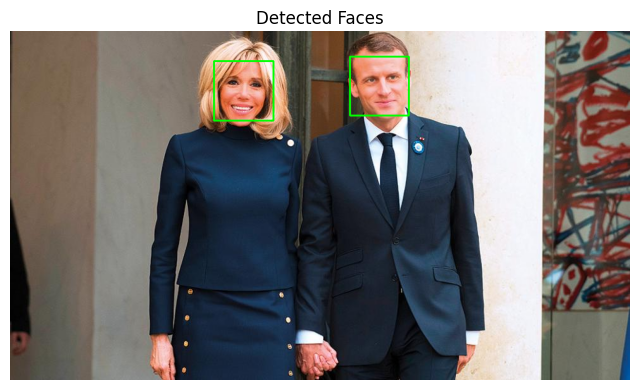

The scores for image /content/TP4_FaceDetection/GT_FaceImages/1.jpg are:
   - The number of correctly detected faces: 0
   - The number of missed detected faces: 0
   - The number of false alarms: 2


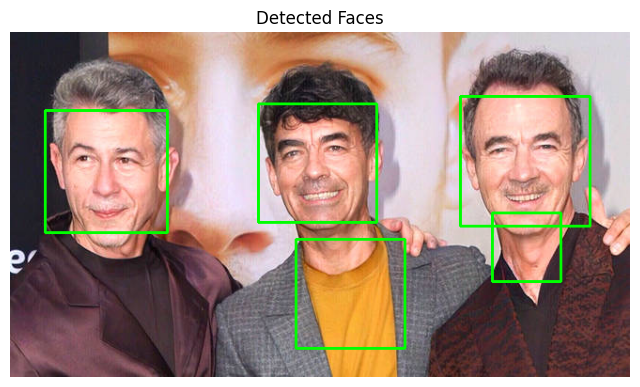

The scores for image /content/TP4_FaceDetection/GT_FaceImages/2.jpg are:
   - The number of correctly detected faces: 2
   - The number of missed detected faces: 0
   - The number of false alarms: 3


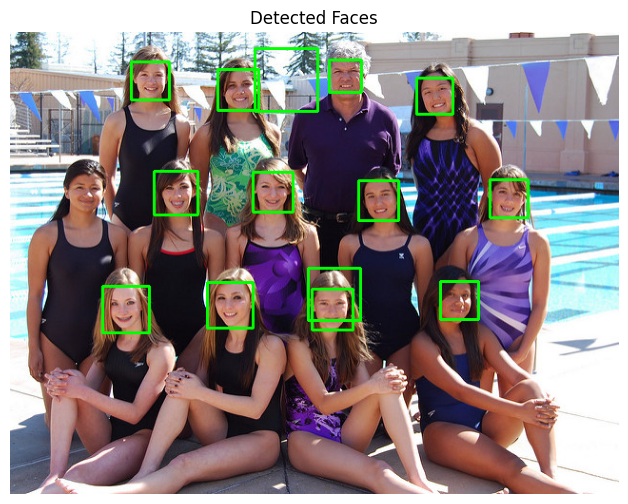

The scores for image /content/TP4_FaceDetection/GT_FaceImages/3.jpg are:
   - The number of correctly detected faces: 0
   - The number of missed detected faces: 0
   - The number of false alarms: 14


In [ ]:
for imgf in imgfiles:
    img = cv2.imread(imgf)

    bboxes = faceDetectionViolaJones(img)

    drawDetectedFaces(img, bboxes)

    compareAgainstGT(imgf, bboxes)

In [ ]:
!ls /content/TP4_FaceDetection/GT_FaceImages

1_GT.txt  1.jpg  2_GT.txt  2.jpg  3_GT.txt  3.jpg


In [ ]:
def faceDetectionMTCNN(img):

    # The faceDetectionMTCNN method receives as input an image
    # and returns the bounding boxes of all the detected faces

    bboxes = []

    #Convert the image from BGR to RGB
    img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)


    #Create the detector, using the default weights
    detector = MTCNN()


    #Detect faces in the image
    detections = detector.detect_faces(img_rgb)


    #Example of what MTCNN returns:
    #{'box': [547, 33, 80, 102], 'confidence': 0.999948263168335, 'keypoints': {'left_eye': (571, 77), 'right_eye': (605, 72), 'nose': (592, 96), 'mouth_left': (577, 112), 'mouth_right': (609, 109)}}

    #Save all the faces bounding boxes in the bboxes list
    for det in detections:
        x1, y1, w, h = det['box']
        x2 = x1 + w
        y2 = y1 + h
        bboxes.append([x1, y1, x2, y2])

    #MTCNN detector returns bounding boxes as [x1, y1, w, h].
    # Convert them to a format [x1, y1, x2, y2]

    return bboxes

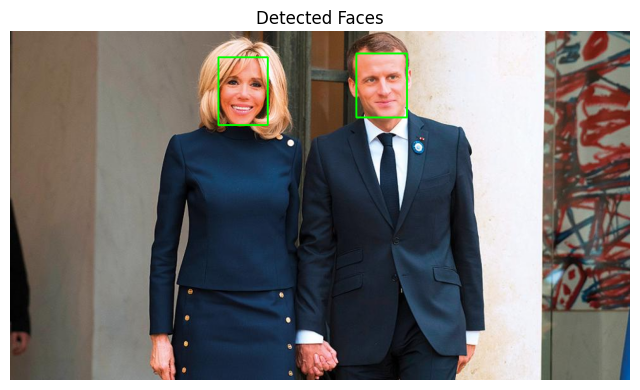

The scores for image /content/TP4_FaceDetection/GT_FaceImages/1.jpg are:
   - The number of correctly detected faces: 0
   - The number of missed detected faces: 0
   - The number of false alarms: 2


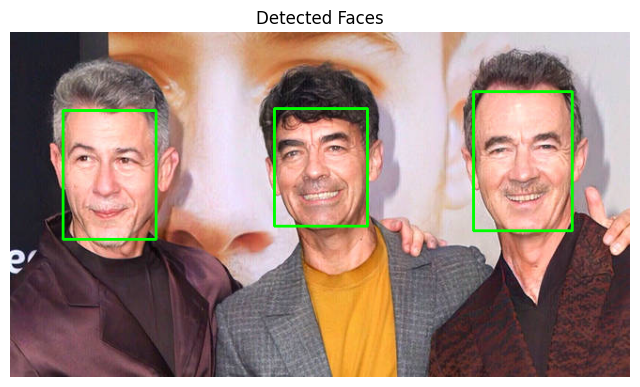

The scores for image /content/TP4_FaceDetection/GT_FaceImages/2.jpg are:
   - The number of correctly detected faces: 1
   - The number of missed detected faces: 0
   - The number of false alarms: 2


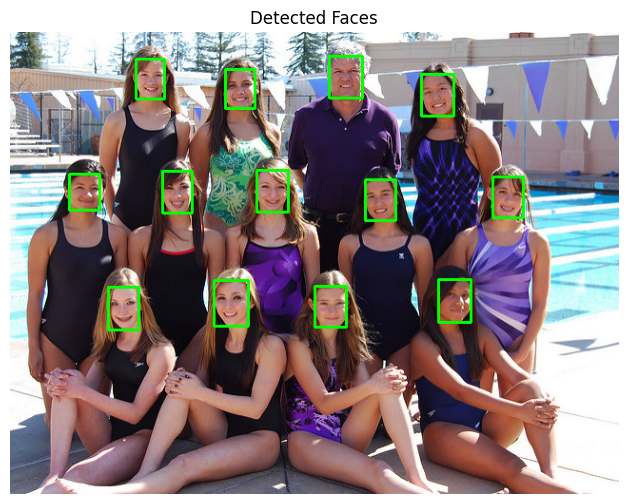

The scores for image /content/TP4_FaceDetection/GT_FaceImages/3.jpg are:
   - The number of correctly detected faces: 0
   - The number of missed detected faces: 0
   - The number of false alarms: 13


In [ ]:
for imgf in imgfiles:
    img = cv2.imread(imgf)
    bboxes = faceDetectionMTCNN(img)

    drawDetectedFaces(img, bboxes)

    compareAgainstGT(imgf, bboxes)


In [ ]:
def faceDetectionInVideos():
    # Charger la vidéo
    cap = cv2.VideoCapture("/content/sample_data/videoFaces.mp4")

    # Vérifier si la vidéo a bien été chargée
    if not cap.isOpened():
        print("Erreur : impossible d'ouvrir la vidéo.")
        return

    # Récupérer les dimensions et la fréquence d’images de la vidéo
    width  = int(cap.get(cv2.CAP_PROP_FRAME_WIDTH))
    height = int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))
    fps    = cap.get(cv2.CAP_PROP_FPS)

    # Définir les codecs et initialiser les objets VideoWriter
    fourcc = cv2.VideoWriter_fourcc(*'mp4v')
    out_viola = cv2.VideoWriter('/content/sample_data/videoFaces_Detected_ViolaJones.mp4', fourcc, fps, (width, height))
    out_mtcnn = cv2.VideoWriter('/content/sample_data/videoFaces_Detected_MTCNN.mp4', fourcc, fps, (width, height))

    # Créer les détecteurs
    viola_classifier = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')
    mtcnn_detector = MTCNN()

    while True:
        ret, frame = cap.read()
        if not ret:
            break  # fin de la vidéo

        # === Viola-Jones ===
        gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
        faces_viola = viola_classifier.detectMultiScale(gray, scaleFactor=1.1, minNeighbors=3)
        frame_viola = frame.copy()
        for (x, y, w, h) in faces_viola:
            cv2.rectangle(frame_viola, (x, y), (x+w, y+h), (0, 255, 0), 2)
        out_viola.write(frame_viola)

        # === MTCNN ===
        rgb = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
        faces_mtcnn = mtcnn_detector.detect_faces(rgb)
        frame_mtcnn = frame.copy()
        for face in faces_mtcnn:
            x, y, w, h = face['box']
            cv2.rectangle(frame_mtcnn, (x, y), (x + w, y + h), (255, 0, 0), 2)
        out_mtcnn.write(frame_mtcnn)

    # Libérer les ressources
    cap.release()
    out_viola.release()
    out_mtcnn.release()
    print("Les vidéos ont été sauvegardées :")
    print(" - /content/sample_data/videoFaces_Detected_ViolaJones.mp4")
    print(" - /content/sample_data/videoFaces_Detected_MTCNN.mp4")

In [ ]:
faceDetectionInVideos()


Les vidéos ont été sauvegardées :
 - /content/sample_data/videoFaces_Detected_ViolaJones.mp4
 - /content/sample_data/videoFaces_Detected_MTCNN.mp4


In [ ]:
!pip uninstall -y tensorflow keras keras-vggface keras-applications numpy
!pip install tensorflow==2.12 keras==2.12 keras-applications==1.0.8 keras-vggface numpy==1.23.5
!pip install mtcnn

Found existing installation: tensorflow 2.18.0
Uninstalling tensorflow-2.18.0:
  Successfully uninstalled tensorflow-2.18.0
Found existing installation: keras 3.8.0
Uninstalling keras-3.8.0:
  Successfully uninstalled keras-3.8.0
Found existing installation: numpy 2.0.2
Uninstalling numpy-2.0.2:
  Successfully uninstalled numpy-2.0.2
INFO: pip is looking at multiple versions of jax to determine which version is compatible with other requirements. This could take a while.
INFO: pip is still looking at multiple versions of jax to determine which version is compatible with other requirements. This could take a while.
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 586.0/586.0 MB 1.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 1.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.7/50.7 kB 3.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.1/17.1 MB 62.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 46.4 MB/s 

In [ ]:
!sed -i 's/from keras.engine.topology import get_source_inputs/from keras.utils.layer_utils import get_source_inputs/' /usr/local/lib/python3.11/dist-packages/keras_vggface/models.py


In [ ]:
import cv2
import glob
from mtcnn.mtcnn import MTCNN
from keras_vggface.vggface import VGGFace
import numpy as np
from keras_vggface.utils import preprocess_input
from keras_vggface import utils
from scipy.spatial.distance import cosine



In [ ]:
imgfiles = glob.glob("/content/TP4_FaceDetection/FaceReID/*.jpg")

In [ ]:
def faceDetectionMTCNN(img):

  # The faceDetectionMTCNN method receives as input an image
  # and returns a list of image patches containing the cropped faces

  croppedFaces = []

  # Convert the image from BGR to RGB
  img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)



  # Create the detector, using the default weights
  detector = MTCNN()



  # Detect faces in the image
  detections = detector.detect_faces(img_rgb)



  #Save images with the cropped faces in the croppedFaces list
  for det in detections:
      x, y, w, h = det['box']
      x1 = max(0, x)
      y1 = max(0, y)
      x2 = x1 + w
      y2 = y1 + h
      face_crop = img_rgb[y1:y2, x1:x2]
      croppedFaces.append(face_crop)



  return croppedFaces

In [ ]:
def extractCNNFeatures(croppedFaces):
  #Extract CNN features from cropped face images

  feats = []

  #Create a vggface model object
  resizedFaces = []
  model = VGGFace(model='vgg16', include_top=False, input_shape=(224, 224, 3), pooling='avg')

  for crFace in croppedFaces:
      #Resize the image to (224, 224)
      resized = cv2.resize(crFace, (224, 224))
      resized = img_to_array(resized)
      resizedFaces.append(resized)



  #Convert resizedFaces to a float32 numpy array of size (n, 224, 224, 3)
  resizedFaces = np.array(resizedFaces, dtype='float32')

  #Pre-process the face images to the standard format accepted by VGG16
  resizedFaces = preprocess_input(resizedFaces, version=1)

  #Extract the low level features by forwarding the images through the CNN
  feats = model.predict(resizedFaces)

  return feats

In [ ]:
import os
from tensorflow.keras.preprocessing.image import img_to_array

featsDict = {}
for img_name in os.listdir('/content/TP4_FaceDetection/GT_FaceImages'):
    if img_name.endswith('.jpg'):
        img = cv2.imread(f'/content/TP4_FaceDetection/GT_FaceImages/{img_name}')
        cropped = faceDetectionMTCNN(img)
        feats = extractCNNFeatures(cropped)
        featsDict[img_name] = feats


1/1 [==============================] - 7s 7s/step


In [ ]:
def personReID(featsDict):

    #This function find the images that contain the same character
    threshold = 0.3
    img_names = list(featsDict.keys())
    n = len(img_names)

    # Comparer chaque paire d’images
    for i in range(n):
        for j in range(i + 1, n):
            feats_i = featsDict[img_names[i]]
            feats_j = featsDict[img_names[j]]

            # Comparer chaque visage de l'image i avec chaque visage de l'image j
            for vec_i in feats_i:
                for vec_j in feats_j:
                    sim = cosine(vec_i, vec_j)
                    if sim < threshold:
                        print(f"{img_names[i]} and {img_names[j]} likely contain the same person (cosine distance = {sim:.2f})")
                        break

In [ ]:
featsDict = {}

for imgf in imgfiles:

  #Open the images one by one from the FaceReID folder
  img = cv2.imread(imgf)
  img_name = os.path.basename(imgf)

  #Call the faceDetectionMTCNN method
  croppedFaces = faceDetectionMTCNN(img)


  #Call the extractCNNFeatures method
  feats = extractCNNFeatures(croppedFaces)


  #Store the face features returned by the extractCNNFeatures method
  # into a dictionary (featsDict) where the key represents the image name,
  # while the values are given by the list of face features
  featsDict[img_name] = feats




  #Call the function personReID

personReID(featsDict)


1/1 [==============================] - 1s 1s/step


1/1 [==============================] - 1s 668ms/step


1/1 [==============================] - 1s 605ms/step
6.jpg and 1.jpg likely contain the same person (cosine distance = 0.17)
6.jpg and 2.jpg likely contain the same person (cosine distance = 0.24)
6.jpg and 3.jpg likely contain the same person (cosine distance = 0.14)
1.jpg and 2.jpg likely contain the same person (cosine distance = 0.20)
1.jpg and 3.jpg likely contain the same person (cosine distance = 0.19)
4.jpg and 5.jpg likely contain the same person (cosine distance = 0.15)
2.jpg and 3.jpg likely contain the same person (cosine distance = 0.21)
